In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Read the dataset
flood_df= pd.read_csv("../data/concatenated_data1.csv")
print(f'Shape of concatenated data  is: {flood_df.shape}')

Shape of concatenated data  is: (38809, 49)


In [3]:
flood_df.head()

,index,datetime,name,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,...,precipitation_sum,rain_sum,precipitation_hours,et0_fao_evapotranspiration,windspeed,temperature_2m_max,temperature_2m_min,apparent_temperature_max(°C),apparent_temperature_min(°C),windspeed_10m_max
0,0,17-08-2023,barisal,34.0,27.3,30.0,45.0,31.4,36.7,25.8,...,2.8,2.8,9.0,3.99,NaN,NaN,NaN,NaN,NaN,NaN
1,1,16-08-2023,barisal,34.3,27.1,30.2,45.2,30.6,37.4,26.1,...,18.3,18.3,16.0,3.37,NaN,NaN,NaN,NaN,NaN,NaN
2,2,15-08-2023,barisal,33.6,26.9,29.6,43.8,30.0,35.8,25.6,...,15.3,15.3,14.0,3.11,NaN,NaN,NaN,NaN,NaN,NaN
3,3,14-08-2023,barisal,31.9,25.1,28.3,38.0,25.1,32.3,25.2,...,22.9,22.9,16.0,3.33,NaN,NaN,NaN,NaN,NaN,NaN
4,4,13-08-2023,barisal,28.3,25.6,26.8,35.0,25.6,29.4,25.6,...,15.4,15.4,18.0,1.84,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38809 entries, 0 to 38808
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         38809 non-null  int64  
 1   datetime                      38809 non-null  object 
 2   name                          38809 non-null  object 
 3   tempmax_x                     38809 non-null  float64
 4   tempmin_x                     38809 non-null  float64
 5   temp                          38809 non-null  float64
 6   feelslikemax                  38809 non-null  float64
 7   feelslikemin                  38809 non-null  float64
 8   feelslike                     38809 non-null  float64
 9   dew                           38809 non-null  float64
 10  humidity                      38809 non-null  float64
 11  precip                        38809 non-null  float64
 12  precipprob                    38809 non-null  int64  
 13  p

In [6]:
flood_df=flood_df.drop(columns=["Unnamed: 0","index"], axis=1)

In [7]:
flood_df.columns

Index(['datetime', 'name', 'tempmax_x', 'tempmin_x', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed_x', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon',
       'stations', 'river_discharge', 'weathercode', 'temperature_2m_mean',
       'apparent_temperature_mean', 'precipitation_sum', 'rain_sum',
       'precipitation_hours', 'et0_fao_evapotranspiration', 'windspeed',
       'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max(°C)', 'apparent_temperature_min(°C)',
       'windspeed_10m_max'],
      dtype='object')

In [8]:
null_percentage=round(flood_df.isnull().sum() / len(flood_df) * 100, 2)
null_percentage

datetime                         0.00
name                             0.00
tempmax_x                        0.00
tempmin_x                        0.00
temp                             0.00
feelslikemax                     0.00
feelslikemin                     0.00
feelslike                        0.00
dew                              0.00
humidity                         0.00
precip                           0.00
precipprob                       0.00
precipcover                      0.00
preciptype                      44.21
snow                            85.56
snowdepth                       85.54
windgust                        83.75
windspeed_x                     10.94
winddir                          0.00
sealevelpressure                 5.43
cloudcover                       0.00
visibility                       5.40
solarradiation                   0.00
solarenergy                      0.00
uvindex                          0.00
severerisk                      85.56
sunrise     

In [9]:
# Drop the columns with more than 80% null values

threshold = 80  # Set the threshold for null values

# Get the columns that have more than 80% null values
columns_to_drop = null_percentage[null_percentage > threshold].index

flood_df.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Dropped Columns: 

columns_to_drop

Index(['snow', 'snowdepth', 'windgust', 'severerisk', 'windspeed',
       'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max(°C)', 'apparent_temperature_min(°C)',
       'windspeed_10m_max'],
      dtype='object')

In [11]:
flood_df.shape

(38809, 37)

In [15]:
round(flood_df.isnull().sum() / len(flood_df) * 100, 2)

datetime                       0.00
name                           0.00
tempmax_x                      0.00
tempmin_x                      0.00
temp                           0.00
feelslikemax                   0.00
feelslikemin                   0.00
feelslike                      0.00
dew                            0.00
humidity                       0.00
precip                         0.00
precipprob                     0.00
precipcover                    0.00
preciptype                    44.21
windspeed_x                   10.94
winddir                        0.00
sealevelpressure               5.43
cloudcover                     0.00
visibility                     5.40
solarradiation                 0.00
solarenergy                    0.00
uvindex                        0.00
sunrise                        0.00
sunset                         0.00
moonphase                      0.00
conditions                     0.00
description                    9.06
icon                        

In [18]:
# Skewness of columns with null values (Numeriam Values): 

skewness_values = flood_df[['river_discharge', 'visibility', 'windspeed_x', "sealevelpressure"]].skew()
skewness_values

river_discharge     5.263677
visibility          2.723800
windspeed_x         5.308662
sealevelpressure   -0.107902
dtype: float64

In [19]:
# Remove the NaN values and replace with Median:

columns_with_null = ['river_discharge', 'visibility', 'windspeed_x', 'sealevelpressure']

flood_df[columns_with_null] = flood_df[columns_with_null].fillna(flood_df[columns_with_null].median())

In [20]:
flood_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempmax_x,38809.0,49.277832,27.320485,16.00,30.20,33.40,81.80,116.90
tempmin_x,38809.0,36.167350,22.419196,2.00,20.90,26.00,56.90,90.40
temp,38809.0,42.143967,24.583356,10.40,25.80,29.00,68.40,102.50
feelslikemax,38809.0,54.467961,29.029439,16.00,33.30,41.30,81.40,135.10
feelslikemin,38809.0,36.655549,22.510804,-4.90,20.90,26.00,56.90,102.50
feelslike,38809.0,44.964647,25.423946,9.50,26.40,34.00,68.30,110.20
dew,38809.0,34.433688,22.030064,-1.80,19.40,25.50,51.40,82.10
humidity,38809.0,73.729491,15.107964,11.10,66.20,77.50,85.00,98.60
precip,38809.0,6.493598,21.641257,0.00,0.00,0.10,4.00,695.90
precipprob,38809.0,55.693267,49.675450,0.00,0.00,100.00,100.00,100.00


In [21]:
# Check if "precipitation_sum" and "rain_sum" are the same:

are_same = flood_df['precipitation_sum'].equals(flood_df['rain_sum'])
print(f'precipitation_sum and rain_sum are the same: {are_same}')

precipitation_sum and rain_sum are the same: True


In [22]:
# Check if "precipitation_sum" and "rain_sum" are the same:

are_same = flood_df['icon'].equals(flood_df['conditions'])
print(f'icon and conditions are the same: {are_same}')

icon and conditions are the same: False


In [23]:
# Drop "rain_sum" column:

flood_df=flood_df.drop("rain_sum", axis=1)

In [24]:
# Calculating "precipitation_rate"

flood_df["precipitation_rate"]=flood_df["precipitation_sum"]/flood_df["precipitation_hours"]
flood_df["precipitation_rate"].fillna(0,inplace=True)

In [26]:
# convert the columns 'datetime', "sunrise" and 'sunsete' to datetime64:

flood_df['datetime']=pd.to_datetime(flood_df['datetime'])
flood_df['sunrise']=pd.to_datetime(flood_df['sunrise'])
flood_df['sunset']=pd.to_datetime(flood_df['sunset'])

In [27]:
flood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38809 entries, 0 to 38808
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   datetime                    38809 non-null  datetime64[ns]
 1   name                        38809 non-null  object        
 2   tempmax_x                   38809 non-null  float64       
 3   tempmin_x                   38809 non-null  float64       
 4   temp                        38809 non-null  float64       
 5   feelslikemax                38809 non-null  float64       
 6   feelslikemin                38809 non-null  float64       
 7   feelslike                   38809 non-null  float64       
 8   dew                         38809 non-null  float64       
 9   humidity                    38809 non-null  float64       
 10  precip                      38809 non-null  float64       
 11  precipprob                  38809 non-null  int64     

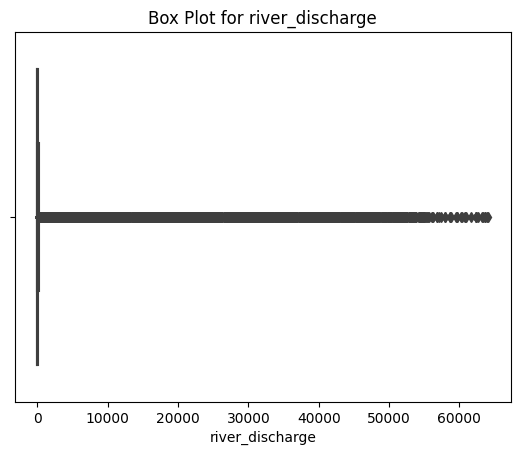

In [28]:
sns.boxplot(x='river_discharge', data=flood_df).set_title('Box Plot for river_discharge');
plt.show()

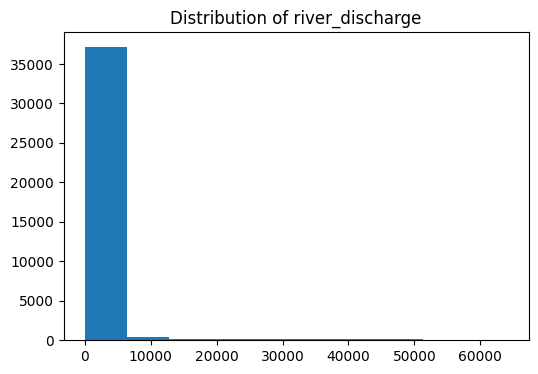

In [29]:
# Distribution of river_discharge:

plt.figure(figsize=(6, 4))
plt.hist(flood_df['river_discharge'])
plt.title('Distribution of river_discharge')
plt.show()